In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm

Swed_Mot = pd.read_csv('SwedishMotor.csv')
Swed_Mot

# These data were compiled by the Swedish Committee on the Analysis of Risk Premium in Motor Insurance, 
# summarized in Hallin and Ingenbleek (1983) and Andrews and Herzberg (1985). The data are cross-sectional,
# describing third party automobile insurance claims for the year 1977.
# The outcomes of interest are the number of claims (the frequency) and sum of payments (the severity), 
# in Swedish kroners. Outcomes are based on 5 categories of distance driven by a vehicle, broken down by 7 geographic zones, 
# 7 categories of recent driver claims experience and 9 types of automobile. Even though there are 2,205 potential distance, 
# zone, experience and type combinations (5 x 7 x 7 x 9 = 2,205), only n = 2,182 were realized in the 1977 data set.

# Variable names: Kilometres Zone Bonus Make Insured Claims Payment

,Kilometres,Zone,Bonus,Make,Insured,Claims,Payment
0,1,1,1,1,455.13,108,392491
1,1,1,1,2,69.17,19,46221
2,1,1,1,3,72.88,13,15694
3,1,1,1,4,1292.39,124,422201
4,1,1,1,5,191.01,40,119373
...,...,...,...,...,...,...,...
2177,5,7,7,5,8.74,0,0
2178,5,7,7,6,16.61,0,0
2179,5,7,7,7,2.83,1,966
2180,5,7,7,8,13.06,0,0


In [5]:
# Check out range of variables
Swed_Mot['Kilometres'].unique()
Swed_Mot['Zone'].unique()
Swed_Mot['Bonus'].unique()
Swed_Mot['Make'].unique()
Swed_Mot['Insured'].unique()
Swed_Mot['Claims'].unique()
Swed_Mot['Payment'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

array([455.13,  69.17,  72.88, ...,   2.83,  13.06, 384.87])

array([ 108,   19,   13,  124,   40,   57,   23,   14, 1704,   45,   10,
          5,   48,   11,    7,    2,  638,   24,    6,    3,    9,  408,
         29,    4,   20,    0,  300,   25,   22,  301,   61,   12,   16,
        522,  214,   60,   41,   92,   37, 1875,   98,  101,   43,   65,
       1326,   33,   30,    8,    1,  591,   17,  320,  269,   27,  282,
        413,  233,   53,   97,   35, 1744,   72,   89,   38,   64, 1205,
        425,   18,  304,   21,  217,  242,  393,  197,   32,   67,   74,
        121,   58, 1865,  115,   36,  105, 1446,  645,  427,  291,   28,
        324,   34,  535,  389,  100,  194,   86, 2894,   15,  407,  174,
        117,  165,   80,  589,   31,   44,  542,  227,  131,   99,   87,
        187,  136,   70,  886,   77,  148,   55, 1410,  722,   78,  484,
        363,  107,  618,  390,   49,   83,  111, 2127,  113,   51, 1157,
        559,  453,   50,  344,  622,  359,   96,   91, 2087,  120,   52,
       1003,   42,  556,  404,  323,  492,  325,   

array([392491,  46221,  15694, ...,  31942,    966, 112252], dtype=int64)

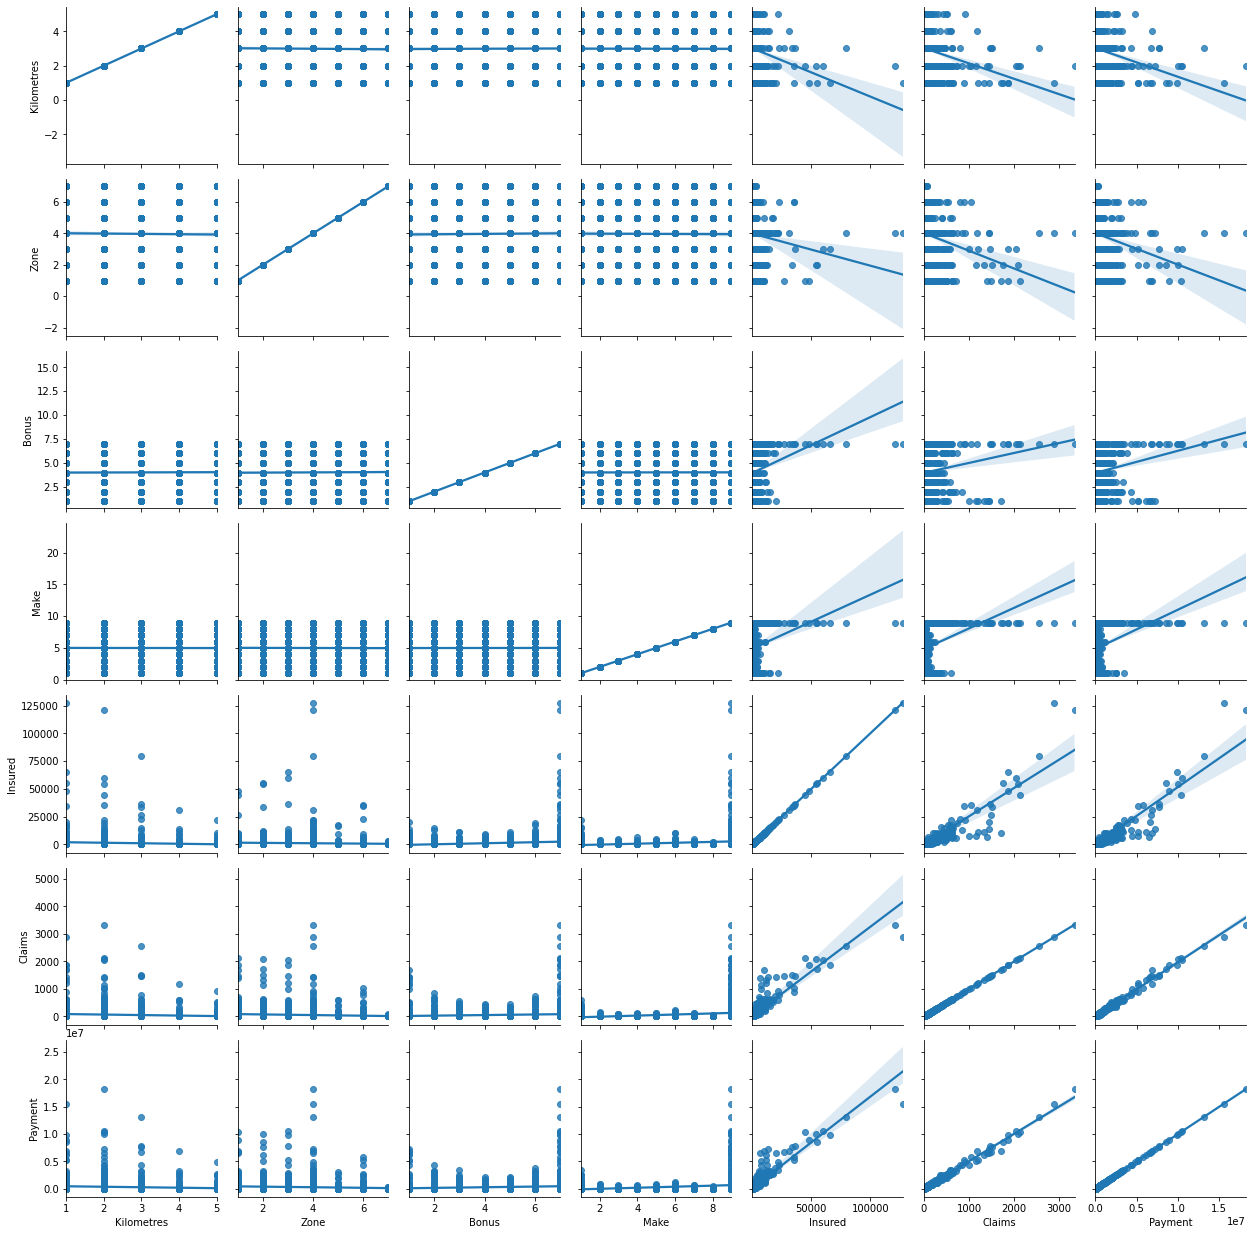

In [8]:
# We want to find out whether kilometres, zone, bonus or make have any significant effect on number of claims or total claims.
# Plot pairwise graphs to see relationship between all columns
g = sns.PairGrid(Swed_Mot)
g.map(sns.regplot)